In [1]:
import tensorflow as tf
from tensorflow import keras

from core.dataset import Dataset

In [2]:
input_A = keras.layers.Input(shape=(5,), name="wide_input")
input_B = keras.layers.Input(shape=(6,), name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [3]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [4]:
@tf.function
def preprocess(line):
    n_inputs = 8
    
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x_A = tf.stack(fields[:5])
    x_B = tf.stack(fields[2:-1])
    y = tf.stack(fields[-1:])
    return (x_A, x_B), y

In [5]:
train_filepaths = ["../data/train.csv"]
valid_filepaths = ["../data/valid.csv"]
test_filepaths = ["../data/test.csv"]

In [7]:
train_set = Dataset.csv_reader_dataset(train_filepaths, preprocess)
valid_set = Dataset.csv_reader_dataset(valid_filepaths, preprocess)
test_set = Dataset.csv_reader_dataset(test_filepaths, preprocess)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Assign: 2, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Assign: 2, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to

In [8]:
batch_size = 32
len_train = sum([1 for _ in open('../data/train.csv')])

history = model.fit(train_set, steps_per_epoch=len_train // batch_size, epochs=20, validation_data=valid_set)
total_loss, main_loss, aux_loss = model.evaluate(test_set)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-08-27 22:36:43.879080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-27 22:36:43.879226: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


347/362 [===========================>..] - ETA: 0s - loss: 4.2484 - output_loss: 4.2514 - aux_output_loss: 4.2208WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x166f22790> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
362/362 [==============================] - 2s 6ms/step - loss: 4.1793 - output_loss: 4.1765 - aux_output_lo

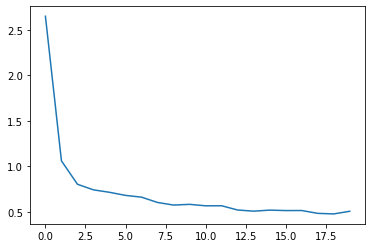

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])